## Modelos de Predicción Perdida y Retención de usuarios en un gimnasio

### Introducción

Una cadena de gimnasios esta intentando interactuar con sus usuarios a través de datos analiticos.

Con estos datos recabados de los usarios se analizarán y se determinaran que factores son los más determinantes que influyen en que el usuario se vaya del gimnasio.

Se suministra un archivo con los datos de los usuarios. Con ellos se deben crear estrategias para lograr la retención de los mismos.

* Se deberá predecir la probabilidad de pérdida (para el próximo mes) para cada cliente

* Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales

* Analizar los factores que más impactan la pérdida

* Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:

* Identificar a los grupos objetivo

* Sugerir medidas para reducir la rotación

* Describir cualquier otro patrón que observes con respecto a la interacción con los clientes

#### Contenido

Carga de librerias

Carga de Dtos

EDA 

Construir un modelo para predecir la cancelación de usuarios

    Regresión Logistica
    Random Forest Classifier

Clusters para usuarios

Conclusiones y Recomendaciones



#### Carga de librerias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import mpl_toolkits.axisartist as axisartist

#### Carga de datos

In [3]:
try:
    gym_data = pd.read_csv('gym_churn_us.csv')
except:
    gym_data = pd.read_csv('/datasets/gym_churn_us.csv') 

In [4]:
#gym_data=pd.read_csv('gym_churn_us.csv')

#### Analisis exploratorio (EDA)

In [5]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
gym_data.columns=gym_data.columns.str.lower()

In [8]:
gym_data.duplicated().sum()

0

In [9]:
gym_data.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Comprobamos que no hay valores nulos o duplicados contenidos en el dataframe

In [10]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [11]:
#Observa los valores medios de las características en dos grupos: para los que se fueron (cancelación) y 
#para los que se quedaron
gym_group_by_churn=gym_data.groupby('churn').agg({'mean'})
gym_group_by_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Se trazarán histogramas de barras y distribuciones de características para aquellos que se fueron (cancelación) y para los que se quedaron.

In [12]:
#Se creará la función grahp_by_categorical para realizar las comparaciones entre las variables
def graph_by_categorical(df, var_for_grouped, categorical):
    group=df.groupby(var_for_grouped)[categorical].value_counts(normalize=True)
    group.name='frecuencia'
    group=group.to_frame().reset_index()
    
    #Crear las graficas
    sns.barplot(data=group, x=var_for_grouped, y='frecuencia', hue=categorical)
    plt.title('Gráfico ' + var_for_grouped + ' vs ' + categorical)
    

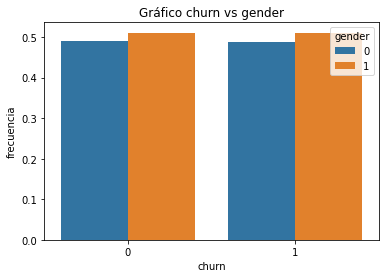

In [13]:
graph_by_categorical(gym_data, 'churn', 'gender')

Se observa en el grafico que para ambos generos es muy similar la distribución de personas que se quedan y de los que se van.

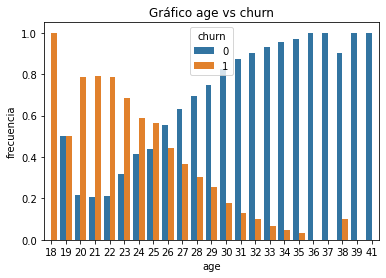

In [14]:
graph_by_categorical(gym_data, 'age', 'churn')

La grafica muestra que a medida que aumenta la edad mayor número de personas permanecen en el gimnasio, mientras que a edades más tempranas la fuga de clientes tiene mayor frecuencia

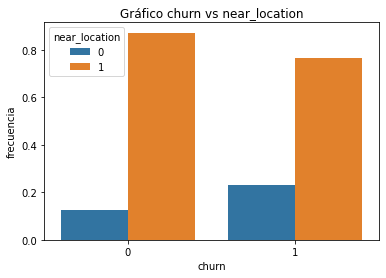

In [15]:
graph_by_categorical(gym_data, 'churn', 'near_location')

Para los clientes que están lejos del gimnasio más del 70% se han ido del mismo, mientras que los clientes que viven lejos se han mantenido al rededor del 10%. Las personas que viven cerca del gimnasio tienen baja asistencia alrededor del 10% y salida por arriba del 20%.

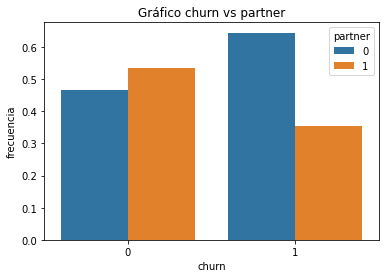

In [16]:
graph_by_categorical(gym_data, 'churn', 'partner')

De los usuarios del gimnasio se observa que más del 50% utilizó patrocinante, de los usuarios que cancelaron casi el 35% utilizó un patrocinador

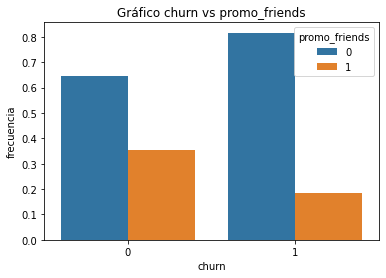

In [17]:
graph_by_categorical(gym_data, 'churn', 'promo_friends')

De las personas que se quedan alrededor del 65% de las personas no utilizarón una promoción de un amigo, de los usuarios del gimnasio que se van poco más del 80% no utilizó una promoción de un amigo

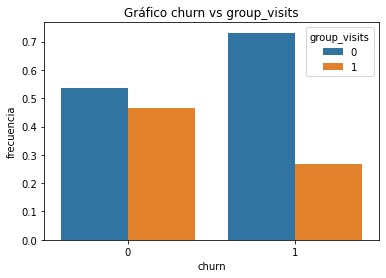

In [18]:
graph_by_categorical(gym_data, 'churn', 'group_visits')

Se puede observar que más del 70% de los usuarios que no participaron en sesiones grupales cancelaron su suscripción

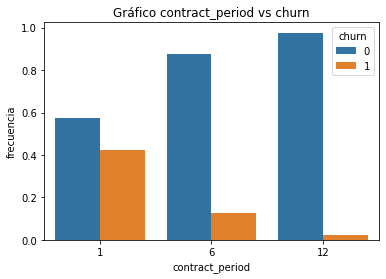

In [19]:
graph_by_categorical(gym_data, 'contract_period', 'churn')

Se observa en la grafica que mientras mayor es el periodo de contrato el número de usuarios que permanece en el gimnasio es mayor, vemos que los contratos a 12 meses se matuvieron los usuarios por arriba del 90%.

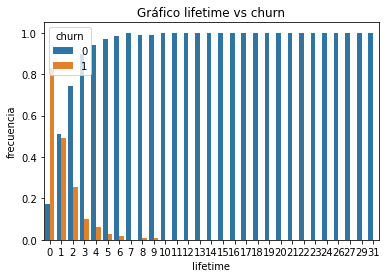

In [20]:
graph_by_categorical(gym_data, 'lifetime', 'churn')

Se puede observar que poco más del 80% de los usuarios cancelaron la suscripción sin asistir al gimnasio, seguidamente se puede desglosar del gráfico que a medida que los usuarios pasan más meses en el gimnasio el porcentaje de cancelación disminuye.

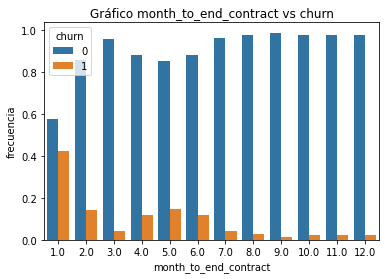

In [21]:
graph_by_categorical(gym_data, 'month_to_end_contract', 'churn')

Se observa en el gráfico que mientras mayor sea el tiempo de duración de contrato mayor es la permanecia de los usuarios en el gimnasio.

Para hacer las distribuciones para las columnas cuantitativas se realizarán histogramas

In [22]:
#División de los datos en dos partes los que tienen churn=0 y los que tienen churn=1
churn_0=gym_data.query('churn==0')
churn_1=gym_data.query('churn==1')

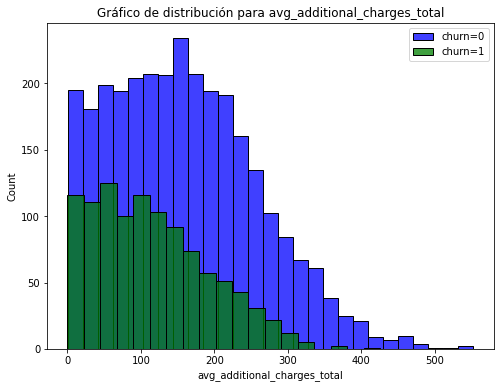

In [23]:
#grafica avg_additional_charges_total
f,ax=plt.subplots(figsize=(8,6))
figure1=sns.histplot(churn_0['avg_additional_charges_total'],color='blue',label='churn=0')
figure2=sns.histplot(churn_1['avg_additional_charges_total'],color='green',label='churn=1')
plt.title('Gráfico de distribución para avg_additional_charges_total')
plt.legend(loc='best')
plt.show()

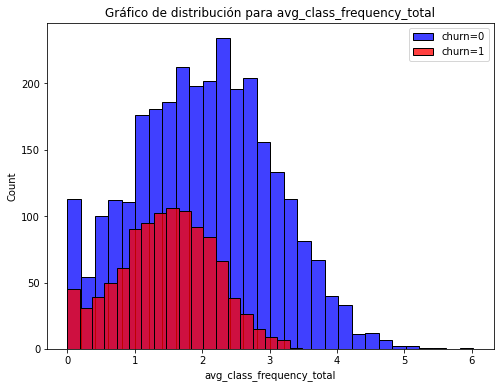

In [24]:
#grafica avg_class_frequency_total
f,ax=plt.subplots(figsize=(8,6))
figure1=sns.histplot(churn_0['avg_class_frequency_total'],color='blue',label='churn=0')
figure2=sns.histplot(churn_1['avg_class_frequency_total'],color='red',label='churn=1')
plt.title('Gráfico de distribución para avg_class_frequency_total')
plt.legend(loc='best')
plt.show()

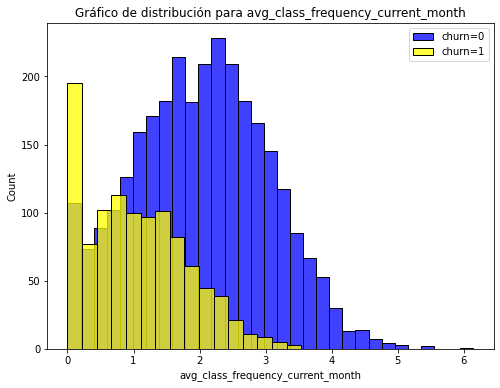

In [25]:
#grafica avg_class_frequency_current_month
f,ax=plt.subplots(figsize=(8,6))
figure1=sns.histplot(churn_0['avg_class_frequency_current_month'],color='blue',label='churn=0')
figure2=sns.histplot(churn_1['avg_class_frequency_current_month'],color='yellow',label='churn=1')
plt.title('Gráfico de distribución para avg_class_frequency_current_month')
plt.legend(loc='best')
plt.show()

Matriz de correlación entre las variables

In [26]:
corr = gym_data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


En la matriz de correlación podemos resaltar que churn tiene una correlación negativa más alta con las siguientes variables *avg_class_frequency_current_month, avg_class_frequency_total, month_to_end_contract, age, contract_period y lifetime* 

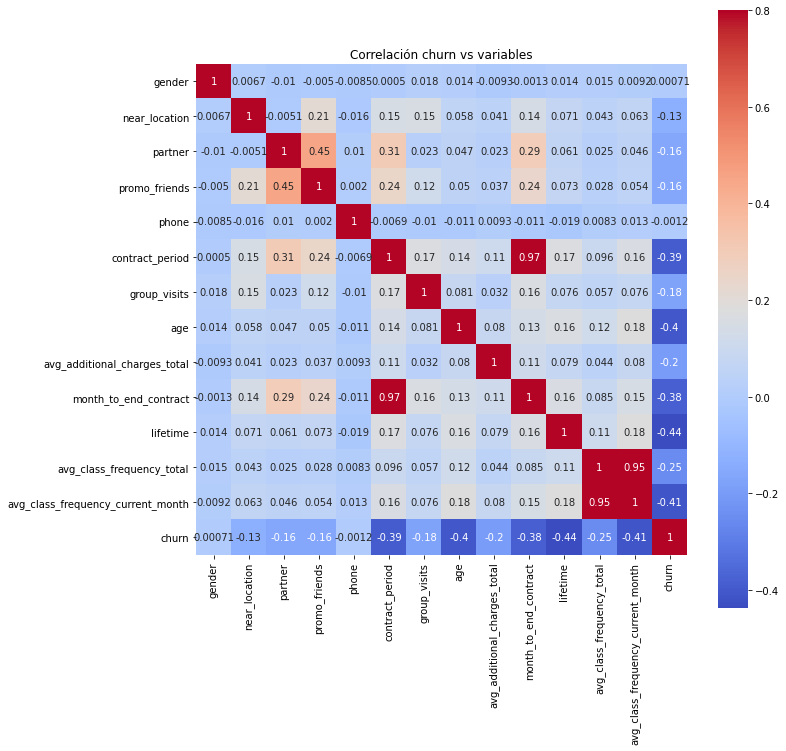

In [27]:
f,ax=plt.subplots(figsize=(11,11))
sns.heatmap(corr,vmax=0.8,annot=True,square=True,cmap='coolwarm')
plt.title('Correlación churn vs variables')
plt.show()

#### Paso 3. Construir un modelo para predecir la cancelación de usuarios

In [28]:
#Vamos a observar la división de datos dentro de churn
gym_data['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

La variable churn no está balanceada, hay mayor número de usuarios para la característica 0 que para la 1.

In [29]:
#División de datos para crear el modelo
X=gym_data.drop('churn', axis=1)
y=gym_data['churn']

In [30]:
#Dividiendo los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#Aplicamos la estandarización
scaler=StandardScaler()

In [32]:
#transformando la matriz para el conjunto de entrenamiento
X_train_st = scaler.fit_transform(X_train) 

In [33]:
#Aplicando la transformación para el consjunto de prueba
X_test_st = scaler.transform(X_test)

#### Comparación de Modelos

Se trabajará con los modelos de LogisticRegression y RandomForestClassifier ya que la variable objetivo es binaria

##### Modelo de Regresión Logística (LogisticRegression)

In [34]:
#Iniciar el modelo de regresión logística
model_rl= LogisticRegression(random_state=0, solver='liblinear')

In [35]:
#Entrenar el modelo
model_rl.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
#Realizando las previsiones
predictions_rl=model_rl.predict(X_test_st)

In [37]:
#Obteniendo la probabilidad de que entre en la clase 1 o 0
probas_rl=model_rl.predict_proba(X_test_st)

In [38]:
#Calculo de métricas de clasificación para el modelo LogicRegression

print('Exactitud: {:.3f}'.format(accuracy_score(y_test, predictions_rl)))
print('Precisión: {:.3f}'.format(precision_score(y_test, predictions_rl)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_rl)))

Exactitud: 0.922
Precisión: 0.854
Recall: 0.828


##### Modelo de Bosque Aleatorio Clasificador (RandomForestClassifier)

In [39]:
#Iniciar el modelo de Bosque aleatorio Clasificador
model_rfc=RandomForestClassifier(random_state=0, n_estimators=100)

In [40]:
#Entrenamiento del modelo
model_rfc.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [41]:
predictions_rfc=model_rfc.predict(X_test_st)

In [42]:
#Calculo de métricas de clasificación para el modelo RandomForestClassifier

print('Exactitud: {:.3f}'.format(accuracy_score(y_test, predictions_rfc)))
print('Precisión: {:.3f}'.format(precision_score(y_test, predictions_rfc)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_rfc)))

Exactitud: 0.915
Precisión: 0.839
Recall: 0.813


Ambos modelos son my parejos en el desempeño, pero el modelo de LogisticRegression es levemente superior al de RandomForestClassifier en exactitud, precisión y recall

#### Paso 4. Crear clústeres de usuarios

In [43]:
#Estandarización de datos
sc=StandardScaler()

In [44]:
#Eliminamos la variable objetivo churn para realizar la transfotmación del resto de las columnas
gym_data_no_churn=gym_data.drop('churn', axis=1)

In [45]:
X_sc=sc.fit_transform(gym_data_no_churn)

In [46]:
#Utilizar la función linkage() para crear una matriz de distancias basada 
#en la matriz de características estandarizada
linked=linkage(X_sc, method='ward')

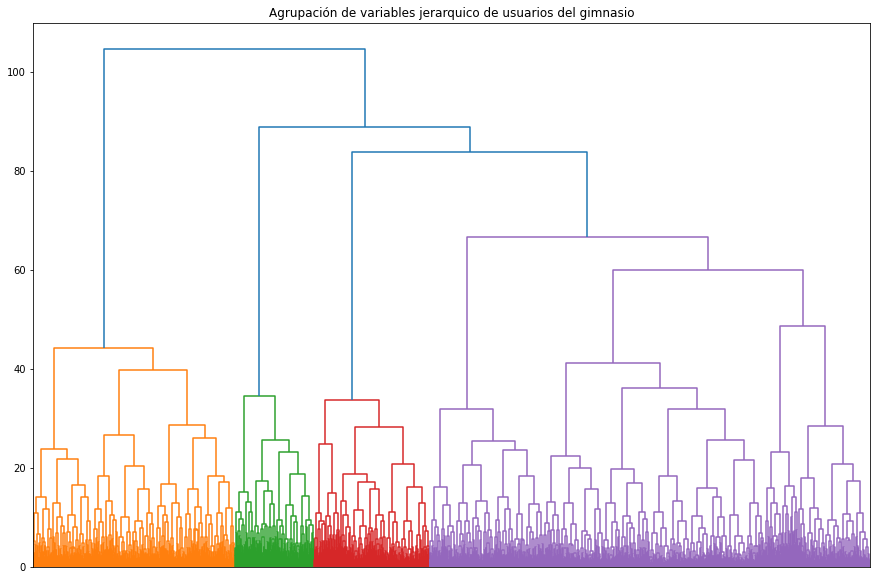

In [47]:
#Crear el dendograma
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.xticks([])
plt.title('Agrupación de variables jerarquico de usuarios del gimnasio')
plt.show()

In [48]:
#Entrenar el modelo de clustering con el algortimo K-means para predecir los clústeres de clientes

#Se tomara el número de clusters n=5
km = KMeans(n_clusters = 5,random_state=0)

In [49]:
#Se aplicará el algoritmo a los datos para fomar un vector de cluster
labels= km.fit_predict(X_sc)

In [50]:
labels

array([1, 0, 3, ..., 0, 0, 1], dtype=int32)

In [51]:
cluster_values=pd.DataFrame(labels,columns=['cluster'])


In [52]:
cluster_values.value_counts()

cluster
3          1262
0          1010
4           838
2           505
1           385
dtype: int64

In [53]:
gym_data_no_churn['cluster']=labels

In [54]:
gym_data_no_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [55]:
#valores medios de característica para clústeres.
km.cluster_centers_

array([[-0.01356529,  0.31552772,  0.59261496,  0.57662146,  0.32681319,
         1.36568854,  0.26585013,  0.24612792,  0.14404709,  1.34476956,
         0.26985253,  0.10590175,  0.19719616],
       [ 0.02366082,  0.04724705, -0.03325194, -0.00434424, -3.05985201,
         0.02324902,  0.02788078,  0.03592699, -0.03099391,  0.03640728,
         0.05333051, -0.0327118 , -0.04814235],
       [-0.03040738, -2.33709981, -0.04678376, -0.49643841,  0.32681319,
        -0.51191571, -0.39900969, -0.21701381, -0.11922153, -0.50700192,
        -0.24403795, -0.22482651, -0.27520459],
       [-0.0498058 ,  0.42788074, -0.2720912 , -0.1485145 ,  0.32681319,
        -0.60001438, -0.14423666, -0.31245911, -0.15929411, -0.58769402,
        -0.34201708, -0.648823  , -0.71544299],
       [ 0.09885252,  0.36189075, -0.25998749, -0.16928796,  0.32277183,
        -0.44223748,  0.12493307,  0.2888459 ,  0.15272611, -0.44462503,
         0.31311849,  1.00088308,  1.02881465]])

##### Trazar distribuciones de características para los clústeres.

In [56]:
#Hallar los centroides y guardandolos en un DataFrame
centroids_df = pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=X_train.columns)
#centroids_df.reset_index(names="centroid", inplace=True)

In [57]:
centroids_df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.500718,0.963743,0.780538,0.580927,1.003028,10.911194,0.549256,29.921250,161.215020,9.965543,4.753294,1.984189,1.972748
1,0.519329,0.868360,0.467757,0.311422,0.029293,4.804201,0.431877,29.240961,144.197032,4.485309,3.933486,1.849237,1.713615
2,0.492298,0.020646,0.460995,0.083144,1.003028,2.369643,0.221313,28.422349,135.619291,2.209173,2.807572,1.662197,1.473786
3,0.482600,1.003688,0.348396,0.244543,1.003028,1.968867,0.346980,28.113452,131.723320,1.871185,2.436597,1.249401,1.008794
4,0.556921,0.980227,0.354445,0.234906,1.001866,2.686622,0.479748,30.059502,162.058819,2.470447,4.917110,2.855527,2.851126


In [58]:
centroids_df=centroids_df.reset_index()

In [59]:
centroids_df.rename(columns={"index": "centroid"}, inplace=True)
centroids_df

,centroid,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.500718,0.963743,0.780538,0.580927,1.003028,10.911194,0.549256,29.921250,161.215020,9.965543,4.753294,1.984189,1.972748
1,1,0.519329,0.868360,0.467757,0.311422,0.029293,4.804201,0.431877,29.240961,144.197032,4.485309,3.933486,1.849237,1.713615
2,2,0.492298,0.020646,0.460995,0.083144,1.003028,2.369643,0.221313,28.422349,135.619291,2.209173,2.807572,1.662197,1.473786
3,3,0.482600,1.003688,0.348396,0.244543,1.003028,1.968867,0.346980,28.113452,131.723320,1.871185,2.436597,1.249401,1.008794
4,4,0.556921,0.980227,0.354445,0.234906,1.001866,2.686622,0.479748,30.059502,162.058819,2.470447,4.917110,2.855527,2.851126


In [60]:
features = [col for col in gym_data.select_dtypes(include=np.number).columns.tolist() if col != "churn"]

In [61]:
centroids_df_melt = centroids_df.melt(
    id_vars="centroid",
    value_vars=features,
    var_name="feature",
    value_name="feature_value"
)

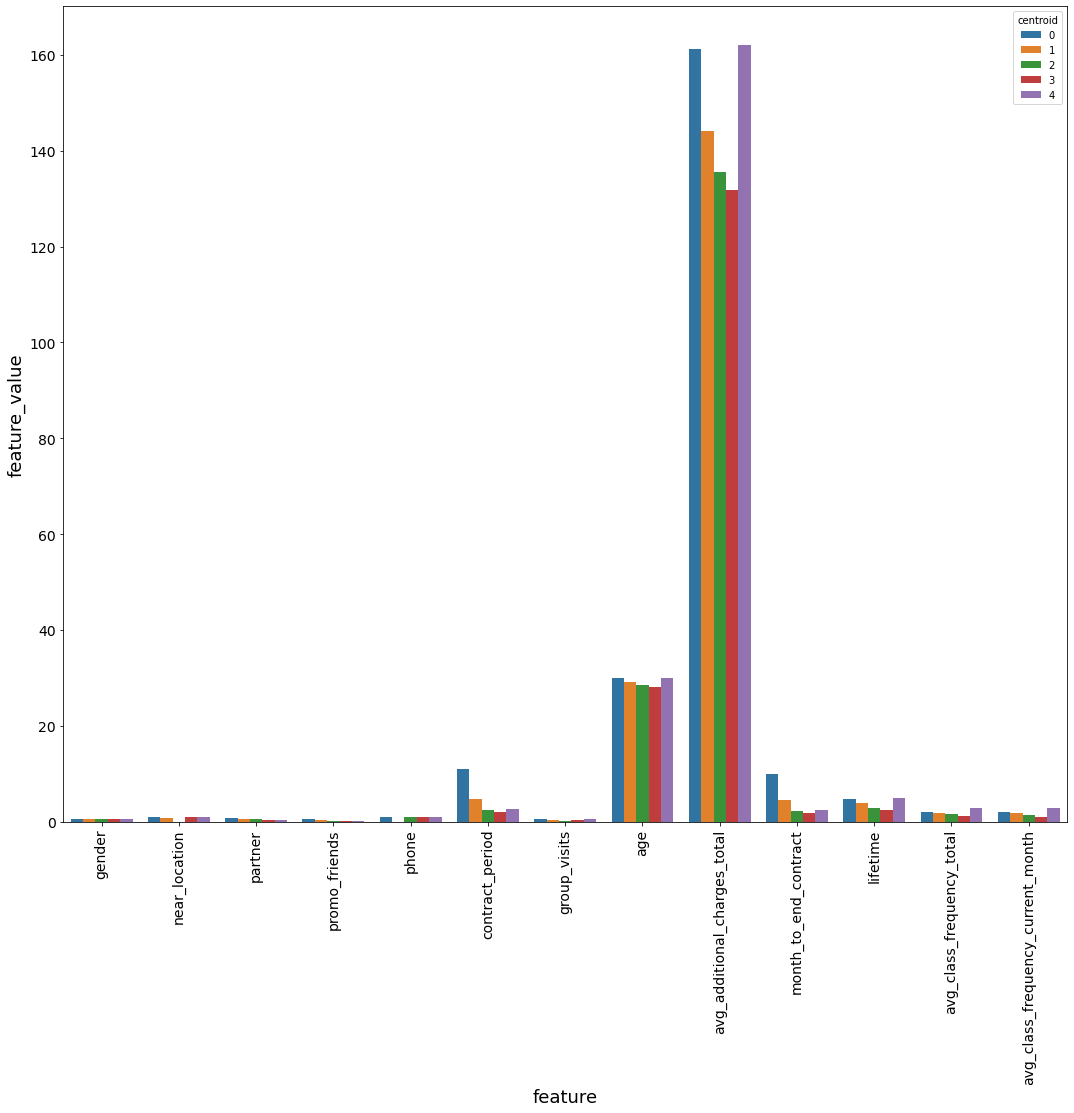

In [62]:
plt.figure(figsize=(18, 15))
my_plot=sns.barplot(data=centroids_df_melt, x="feature", y="feature_value", hue="centroid", 
                    ax=plt.gca())
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, ha='center', minor=False)
plt.xlabel('feature', fontsize=18);
plt.ylabel('feature_value', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Calcula la tasa de cancelación para cada clúster. ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [63]:
gym_data_no_churn['churn']=y_test.reset_index(drop=True)

In [64]:
gym_data_no_churn.groupby('cluster')['churn'].mean().sort_values(ascending=False)

cluster
2    0.325581
3    0.251908
0    0.244898
4    0.224852
1    0.206897
Name: churn, dtype: float64

Se observa que la tasa promedio de cancelacion es del 32,6% para el grupo 2, seguido por la del grupo 3 con el 25.2%

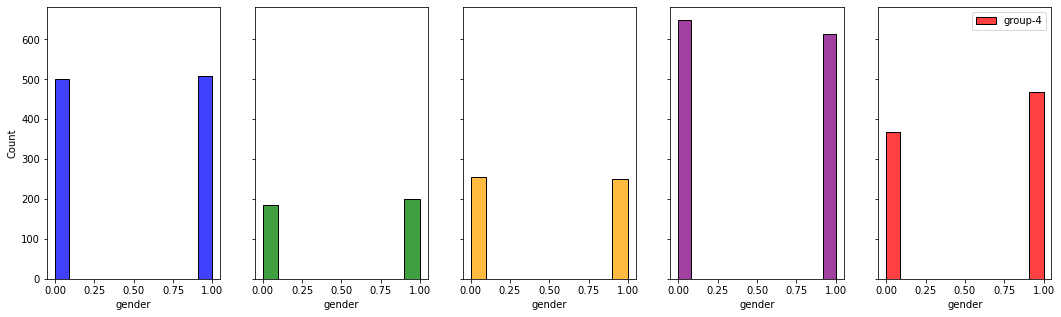

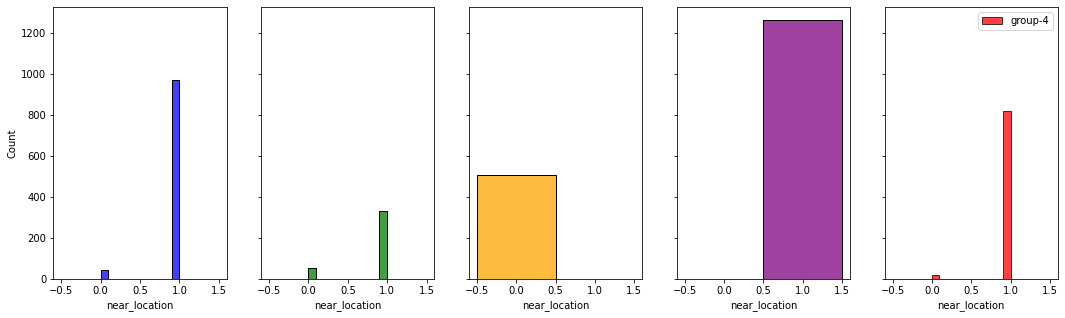

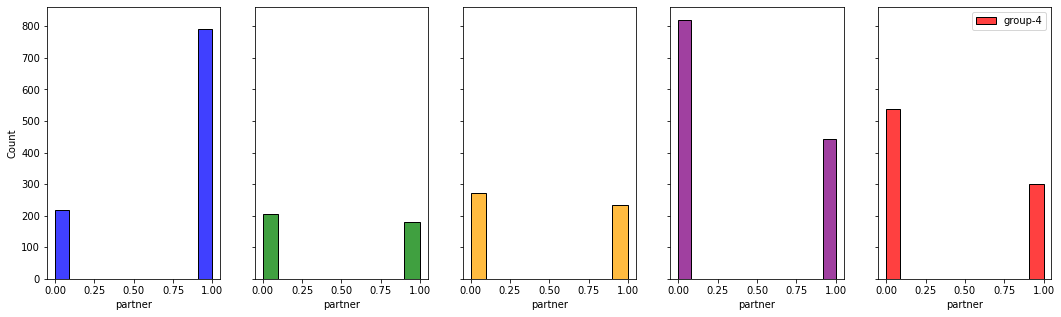

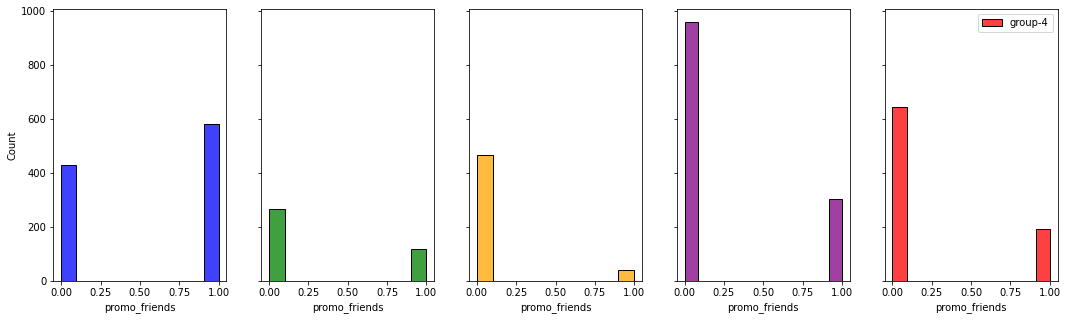

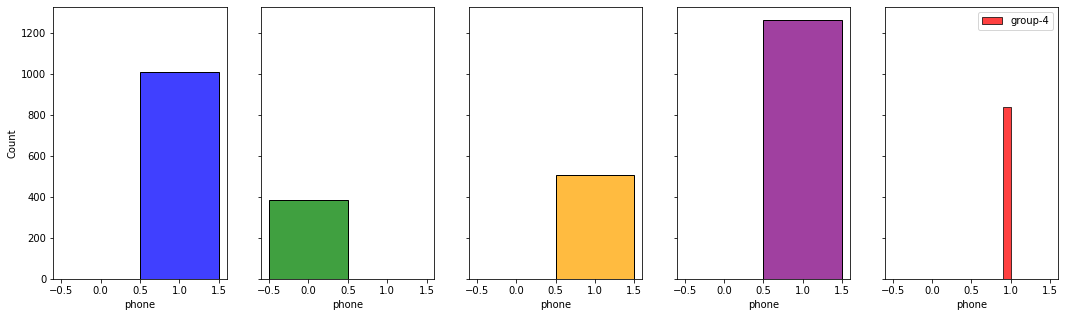

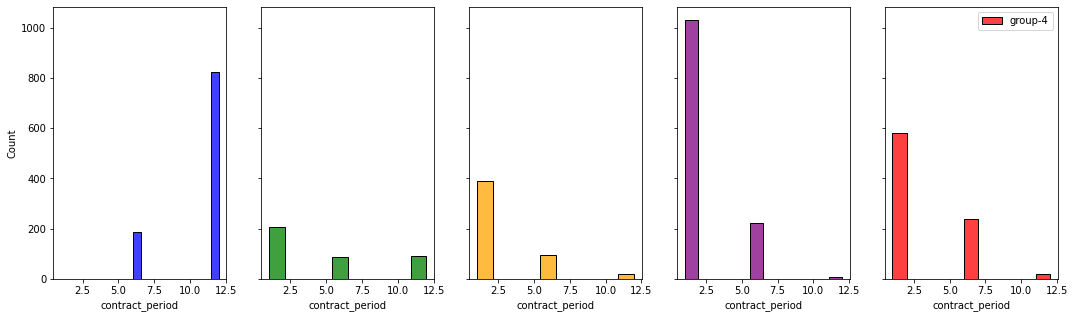

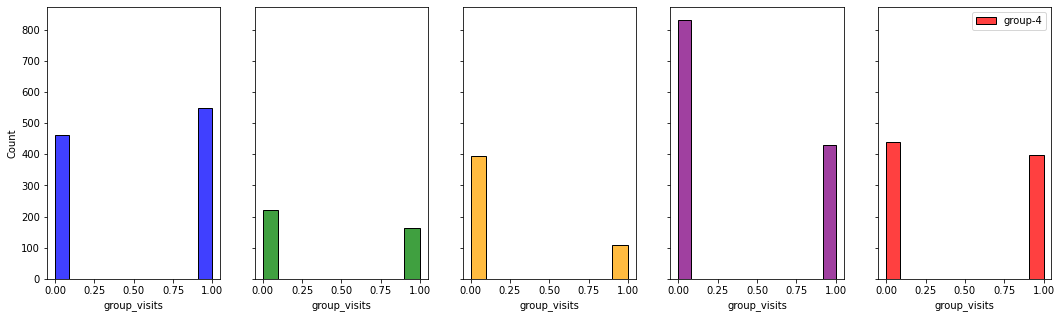

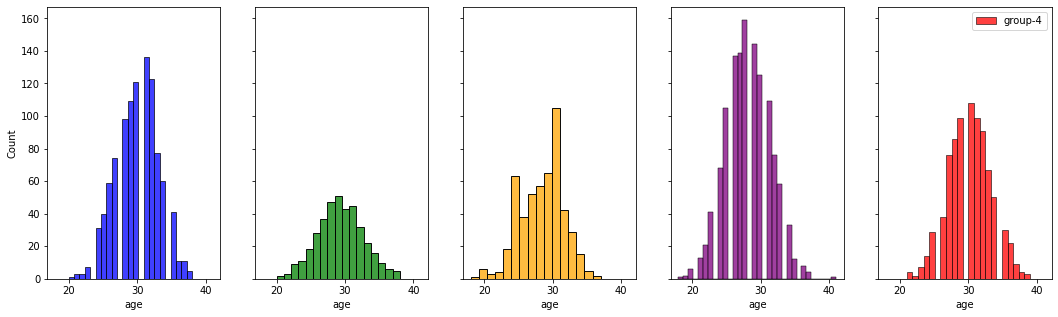

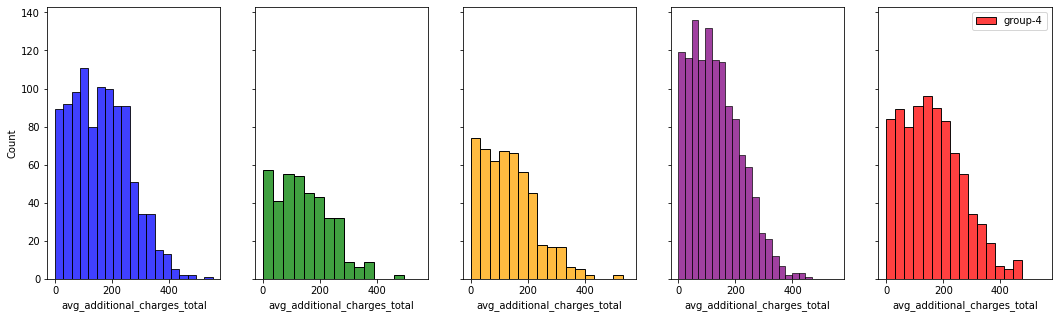

In [ ]:
for col in features:
  fig, ax = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(18,5))
  sns.histplot(gym_data_no_churn[gym_data_no_churn["cluster"] == 0][col], color="blue", label="group-0", ax=ax[0])
  sns.histplot(gym_data_no_churn[gym_data_no_churn["cluster"] == 1][col], color="green", label="group-1", ax=ax[1])
  sns.histplot(gym_data_no_churn[gym_data_no_churn["cluster"] == 2][col], color="orange", label="group-2", ax=ax[2])
  sns.histplot(gym_data_no_churn[gym_data_no_churn["cluster"] == 3][col], color="purple", label="group-3", ax=ax[3])
  sns.histplot(gym_data_no_churn[gym_data_no_churn["cluster"] == 4][col], color="red", label="group-4", ax=ax[4])
  plt.legend()
  plt.show()

Conclusiones y Recomendaciones

* La salida o retención por genero no es tan relevante ya que son muy parejos los número para ambos en para los dos casos

* Hay una tendencia a que medida que aumenta la edad mayor número de personas permanecen en el gimnasio, mientras que a edades más tempranas la fuga de clientes tiene mayor frecuencia. Después de los 26 años la tasa de abandono es 0%. Se sugiere lanzar campañas para captar clientes a partir de esa edad.

* De los usuarios del gimnasio se observa que más del 50% utilizó patrocinante, de los usuarios que cancelaron casi el 35% utilizó un patrocinador

* Se puede observar que más del 70% de los usuarios que no participaron en sesiones grupales cancelaron su suscripción. Se sugiere lanzar ofertas para mejorar la retención o capar clientes con esta modalidad.

* Mientras mayor es el periodo de contrato el número de usuarios que permanece en el gimnasio es mayor, vemos que los contratos a 12 meses se matuvieron los usuarios por arriba del 90%.

* El tiempo de vida de los usuarios es mayor a medida que los usuarios pasan más meses en el gimnasio. Hay un 80% de los usuarios cancelaron la suscripción sin asistir al mismo.

* Se recomienda dar insentivos para que los clientes tomen suscripciones mayores a 6 meses, ya que después de este mes la permanecia es de casi el 100%.

* El modelo de Regresión Logistica tuvo mejor comportamiento que el de modelo de Random Forest Classifier.

* El grupo 2 es el grupo que tiene la tasa más alta de cancelación con el 32,6%

